In [1]:
# NN Libraries
import tensorflow as tf
import tensorflow.keras.backend as kb
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
# Read Raw Data
### Data Structure:
### Meta-data: GamePlayID, Returner ID, Returner's teammates' ID, Tackling team's ID, 
### Returner's tracking data, Returner's teammate's tracking data
### Tackling team's tracking data
### Tracking data includes: x, y, s, a, dis, o, dir, an, d, influence
##### x, y, s, a, dis, o, dir remain the same as NFL's definition.
##### an is the angle between a player and returner
##### d is the euclidean distance between a player and returner
##### influence score is the player's influence (as defined in Pitch Control model) on returner

tackleFileName = 'AnalyzedData/biggg.csv' # read player data for each frame
tackleData = pd.read_csv(tackleFileName, header=0, index_col=0)

# Select usableData (i.e. disregard meta-data such as Game ID, Play ID for training purposes)
colNames = tackleData.columns
colNamesX = colNames[24:241]
colNamesY_outcome = colNames[252:253]
colNamesY_identity = colNames[241:252]

# X_raw: raw input feature matrix (stored in pandas dataframe)
X_raw = tackleData[colNamesX]

# Y: output matrix (stored in pandas dataframe)
Y_outcome = tackleData[colNamesY_outcome]
Y_identity = tackleData[colNamesY_identity]

# define nRow, nFeature
nRow = X_raw.shape[0]
nFeature = X_raw.shape[1]

print('number of samples:', nRow)
print('number of input features:', nFeature)
# display(X_raw)
# display(Y_outcome)
# display(Y_identity)

number of samples: 28480
number of input features: 217


In [3]:
# Data Scaling for NN

min_max_scaler = preprocessing.MinMaxScaler() 
X_scaled = min_max_scaler.fit_transform(X=X_raw) # linearly scale to range [0, 1]
# relNData = preprocessing.normalize(relData) # scale to N(0, 1)
print('Shape of the scaled input matrix is:', X_scaled.shape)

Shape of the scaled input matrix is: (28480, 217)


In [4]:
# Randomly selecting training data
trainPct = 0.8 # select how many data to use in the training set (range = [0, 1])

# indexes
np.random.seed(seed=1)
trainIndex = np.random.choice(nRow, int(nRow * trainPct), replace=False)
testIndex = np.setdiff1d(np.array(range(nRow)), trainIndex)

# data seperation (all data stored in numpy ndarray)
X_train = X_scaled[trainIndex]
Y_outcome_train = Y_outcome.to_numpy()[trainIndex]
Y_identity_train = Y_identity.to_numpy()[trainIndex]

X_test = X_scaled[testIndex]
Y_outcome_test = Y_outcome.to_numpy()[testIndex]
Y_identity_test = Y_identity.to_numpy()[testIndex]

print('Number of input features :', nFeature)
print('Training set has', len(Y_outcome_train), 'frames.')
print('Training set tackling success rate is:', sum(Y_outcome_train)/len(Y_outcome_train)*100, '%')
print('Validation set has', len(Y_outcome_test), 'frames.')
print('Validation set tackling success rate is:', sum(Y_outcome_test)/len(Y_outcome_test)*100, '%')
print(X_train.shape)

Number of input features : 217
Training set has 22784 frames.
Training set tackling success rate is: [77.11551966] %
Validation set has 5696 frames.
Validation set tackling success rate is: [77.28230337] %
(22784, 217)


Epoch 1/150
712/712 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7672 - val_loss: 0.5267 - val_accuracy: 0.7728
Epoch 2/150
712/712 [==============================] - 1s 898us/step - loss: 0.5340 - accuracy: 0.7710 - val_loss: 0.5198 - val_accuracy: 0.7728
Epoch 3/150
712/712 [==============================] - 1s 931us/step - loss: 0.5263 - accuracy: 0.7712 - val_loss: 0.5140 - val_accuracy: 0.7728
Epoch 4/150
712/712 [==============================] - 1s 885us/step - loss: 0.5219 - accuracy: 0.7713 - val_loss: 0.5098 - val_accuracy: 0.7730
Epoch 5/150
712/712 [==============================] - 1s 879us/step - loss: 0.5184 - accuracy: 0.7710 - val_loss: 0.5064 - val_accuracy: 0.7735
Epoch 6/150
712/712 [==============================] - 1s 898us/step - loss: 0.5136 - accuracy: 0.7714 - val_loss: 0.5039 - val_accuracy: 0.7725
Epoch 7/150
712/712 [==============================] - 1s 919us/step - loss: 0.5106 - accuracy: 0.7711 - val_loss: 0.5008 - val_accu

712/712 [==============================] - 1s 884us/step - loss: 0.4559 - accuracy: 0.7879 - val_loss: 0.4711 - val_accuracy: 0.7881
Epoch 58/150
712/712 [==============================] - 1s 888us/step - loss: 0.4548 - accuracy: 0.7890 - val_loss: 0.4708 - val_accuracy: 0.7870
Epoch 59/150
712/712 [==============================] - 1s 878us/step - loss: 0.4535 - accuracy: 0.7914 - val_loss: 0.4711 - val_accuracy: 0.7884
Epoch 60/150
712/712 [==============================] - 1s 892us/step - loss: 0.4530 - accuracy: 0.7905 - val_loss: 0.4710 - val_accuracy: 0.7899
Epoch 61/150
712/712 [==============================] - 1s 903us/step - loss: 0.4524 - accuracy: 0.7916 - val_loss: 0.4702 - val_accuracy: 0.7879
Epoch 62/150
712/712 [==============================] - 1s 887us/step - loss: 0.4533 - accuracy: 0.7904 - val_loss: 0.4707 - val_accuracy: 0.7870
Epoch 63/150
712/712 [==============================] - 1s 904us/step - loss: 0.4506 - accuracy: 0.7904 - val_loss: 0.4712 - val_accuracy

712/712 [==============================] - 1s 892us/step - loss: 0.3791 - accuracy: 0.8294 - val_loss: 0.4621 - val_accuracy: 0.7909
Epoch 114/150
712/712 [==============================] - 1s 893us/step - loss: 0.3786 - accuracy: 0.8295 - val_loss: 0.4689 - val_accuracy: 0.7914
Epoch 115/150
712/712 [==============================] - 1s 876us/step - loss: 0.3759 - accuracy: 0.8316 - val_loss: 0.4615 - val_accuracy: 0.7971
Epoch 116/150
712/712 [==============================] - 1s 889us/step - loss: 0.3720 - accuracy: 0.8321 - val_loss: 0.4627 - val_accuracy: 0.7930
Epoch 117/150
712/712 [==============================] - 1s 884us/step - loss: 0.3712 - accuracy: 0.8325 - val_loss: 0.4631 - val_accuracy: 0.7890
Epoch 118/150
712/712 [==============================] - 1s 911us/step - loss: 0.3698 - accuracy: 0.8332 - val_loss: 0.4659 - val_accuracy: 0.7863
Epoch 119/150
712/712 [==============================] - 1s 886us/step - loss: 0.3658 - accuracy: 0.8384 - val_loss: 0.4625 - val_ac

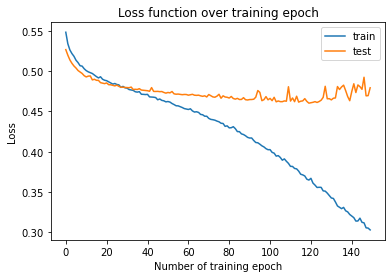

In [5]:
# NN Model for outcome probability prediction
np.random.seed(0)
tf.random.set_seed(0)

# tuning parameters
learning_rate = 0.001

# model Architecture
outcomeLayers = [keras.layers.Dense(400, activation='relu', input_dim=nFeature),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(200, activation='relu'),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(1, activation='sigmoid')
                ]
outcomeModel = keras.Sequential(outcomeLayers)

# compile model
sgd = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8) # stochastic gradient descent as optimizer

outcomeModel.compile(loss='binary_crossentropy',
                     optimizer=sgd, 
                     metrics=['accuracy'])

# early Stopping based on validation loss
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

# train model using training data
time0 = time()
historyData = outcomeModel.fit(X_train, Y_outcome_train, validation_data=(X_test, Y_outcome_test),
                               epochs=150,
                               callbacks=[es], 
                               verbose=1)
print('model runtime:', round(time()-time0, 4), 'seconds')

# evaluate model result
_, train_acc = outcomeModel.evaluate(X_train, Y_outcome_train, verbose=0)
_, test_acc = outcomeModel.evaluate(X_test, Y_outcome_test, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

plt.plot(historyData.history['loss'], label='train')
plt.plot(historyData.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Number of training epoch')
plt.ylabel('Loss')
plt.title('Loss function over training epoch')
plt.show()

Epoch 1/200
712/712 [==============================] - 1s 718us/step - loss: 2.0615 - accuracy: 0.2692 - val_loss: 1.4225 - val_accuracy: 0.5098
Epoch 2/200
712/712 [==============================] - 0s 583us/step - loss: 1.3760 - accuracy: 0.4952 - val_loss: 1.0488 - val_accuracy: 0.5943
Epoch 3/200
712/712 [==============================] - 0s 568us/step - loss: 1.2066 - accuracy: 0.5443 - val_loss: 0.9543 - val_accuracy: 0.6287
Epoch 4/200
712/712 [==============================] - 0s 567us/step - loss: 1.1597 - accuracy: 0.5582 - val_loss: 0.9378 - val_accuracy: 0.6203
Epoch 5/200
712/712 [==============================] - 0s 565us/step - loss: 1.1096 - accuracy: 0.5739 - val_loss: 0.9191 - val_accuracy: 0.6294
Epoch 6/200
712/712 [==============================] - 0s 563us/step - loss: 1.0832 - accuracy: 0.5803 - val_loss: 0.9534 - val_accuracy: 0.6087
Epoch 7/200
712/712 [==============================] - 0s 578us/step - loss: 1.0479 - accuracy: 0.5912 - val_loss: 0.8890 - val_ac

712/712 [==============================] - 0s 568us/step - loss: 0.6147 - accuracy: 0.7282 - val_loss: 0.6156 - val_accuracy: 0.7045
Epoch 58/200
712/712 [==============================] - 0s 570us/step - loss: 0.6099 - accuracy: 0.7319 - val_loss: 0.6604 - val_accuracy: 0.6880
Epoch 59/200
712/712 [==============================] - 0s 582us/step - loss: 0.6054 - accuracy: 0.7304 - val_loss: 0.5837 - val_accuracy: 0.7186
Epoch 60/200
712/712 [==============================] - 0s 574us/step - loss: 0.6087 - accuracy: 0.7346 - val_loss: 0.5957 - val_accuracy: 0.7198
Epoch 61/200
712/712 [==============================] - 0s 558us/step - loss: 0.6013 - accuracy: 0.7339 - val_loss: 0.5845 - val_accuracy: 0.7238
Epoch 62/200
712/712 [==============================] - 0s 563us/step - loss: 0.5982 - accuracy: 0.7351 - val_loss: 0.6098 - val_accuracy: 0.7147
Epoch 63/200
712/712 [==============================] - 0s 573us/step - loss: 0.5966 - accuracy: 0.7372 - val_loss: 0.6583 - val_accuracy

712/712 [==============================] - 0s 560us/step - loss: 0.4941 - accuracy: 0.7843 - val_loss: 0.5247 - val_accuracy: 0.7560
Epoch 114/200
712/712 [==============================] - 0s 564us/step - loss: 0.5026 - accuracy: 0.7792 - val_loss: 0.5298 - val_accuracy: 0.7556
Epoch 115/200
712/712 [==============================] - 0s 561us/step - loss: 0.4931 - accuracy: 0.7850 - val_loss: 0.5231 - val_accuracy: 0.7456
Epoch 116/200
712/712 [==============================] - 0s 560us/step - loss: 0.4922 - accuracy: 0.7844 - val_loss: 0.4960 - val_accuracy: 0.7561
Epoch 117/200
712/712 [==============================] - 0s 558us/step - loss: 0.4867 - accuracy: 0.7856 - val_loss: 0.5047 - val_accuracy: 0.7507
Epoch 118/200
712/712 [==============================] - 0s 567us/step - loss: 0.4890 - accuracy: 0.7878 - val_loss: 0.5012 - val_accuracy: 0.7590
Epoch 119/200
712/712 [==============================] - 0s 562us/step - loss: 0.4828 - accuracy: 0.7891 - val_loss: 0.4945 - val_ac

Epoch 169/200
712/712 [==============================] - ETA: 0s - loss: 0.4567 - accuracy: 0.80 - 0s 563us/step - loss: 0.4618 - accuracy: 0.8078 - val_loss: 0.4953 - val_accuracy: 0.7711
Epoch 170/200
712/712 [==============================] - 0s 568us/step - loss: 0.4730 - accuracy: 0.8059 - val_loss: 0.4869 - val_accuracy: 0.7714
Epoch 171/200
712/712 [==============================] - 0s 571us/step - loss: 0.4666 - accuracy: 0.8099 - val_loss: 0.4582 - val_accuracy: 0.7809
Epoch 172/200
712/712 [==============================] - 0s 559us/step - loss: 0.4517 - accuracy: 0.8106 - val_loss: 0.4694 - val_accuracy: 0.7695
Epoch 173/200
712/712 [==============================] - 0s 559us/step - loss: 0.4568 - accuracy: 0.8096 - val_loss: 0.4642 - val_accuracy: 0.7842
Epoch 174/200
712/712 [==============================] - 0s 560us/step - loss: 0.4518 - accuracy: 0.8139 - val_loss: 0.4841 - val_accuracy: 0.7809
Epoch 175/200
712/712 [==============================] - 0s 566us/step - los

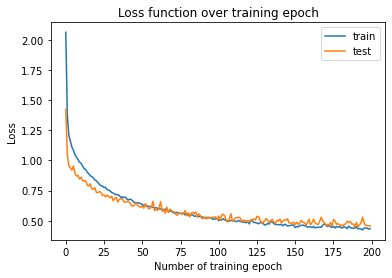

In [15]:
# NN Model for tackler identification
np.random.seed(0)
tf.random.set_seed(3)

# tuning parameters
learning_rate = 0.001

# model Architecture
identityLayers = [keras.layers.Dense(128, activation='relu', input_dim=nFeature),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(64, activation='relu'),
                 keras.layers.Dropout(0.2),
                 keras.layers.Dense(11, activation='softmax')
                ]
identityModel = keras.Sequential(identityLayers)

# compile model
adam = keras.optimizers.Adam(learning_rate=learning_rate) #stochastic gradient descent method based on adaptive 
                                                          #estimation of 1st order and 2nd order moments
identityModel.compile(loss='categorical_crossentropy',
                      optimizer=adam,
                      metrics=['accuracy'])

# Early Stopping based on validation loss
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

# train model using training data
time0 = time()
historyData = identityModel.fit(X_train, Y_identity_train, validation_data=(X_test, Y_identity_test),
                               epochs=200,
                               callbacks=[es], 
                               verbose=1)
print('model runtime:', round(time()-time0, 4), 'seconds')

# evaluate model result
_, train_acc = identityModel.evaluate(X_train, Y_identity_train, verbose=0)
_, test_acc = identityModel.evaluate(X_test, Y_identity_test, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_acc, test_acc))

plt.plot(historyData.history['loss'], label='train')
plt.plot(historyData.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Number of training epoch')
plt.ylabel('Loss')
plt.title('Loss function over training epoch')
plt.show()

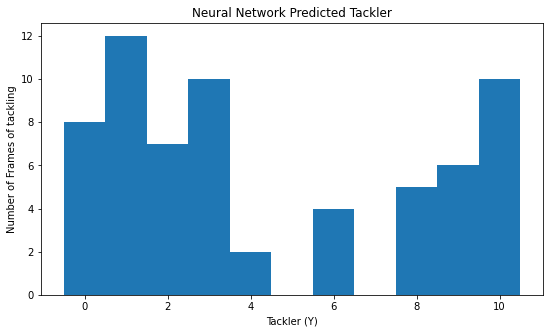

Tackler (Y) sequence is shown below:
[ 4  4  9  9  9  9  9  9  8  8  8  8  8  1  1  1  1  1  1  1  1  1  1  1
 10 10 10 10 10 10 10 10 10 10  2  2  2  2  2  2  6  6  6  6  2  1  3  0
  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3  3]


In [16]:
# Test Tackler Identification NN model with GamePlay 2502-2018123000
np.random.seed(0)
tf.random.set_seed(0)

game1FileName = 'AnalyzedData/game1.csv' # read all frames from gameplay 2502-2018123000
game1Data = pd.read_csv(game1FileName, header=0, index_col=0)

# X_raw: raw input feature matrix (stored in pandas dataframe)
colNames_game1 = game1Data.columns[24:241]
X_game1_raw = game1Data[colNames_game1]
X_game1_scaled = min_max_scaler.fit_transform(X=X_game1_raw) # linearly scale to range [0, 1]

# predict tackler identity
Y_game1_identity_predicted = np.argmax(identityModel.predict(X_game1_scaled), axis=-1)

# Y  Jersey#  NFLID   Tackle Sequence   PFF Label
# =================================================
# 0: BAL4,    31018   8th              (PFF: mistackle)
# 1: BAL41,   36060   3rd              (PFF: N/A, got spinned)
# 2: BAL46,   36086   6th              (PFF: N/A, bad speed)
# 3: BAL87,   42398   9th              (PFF: success)
# 4: BAL86,   42514   5th              (PFF: N/A, bad angel bad speed)
# 5: BAL10,   43396   N/A
# 6: BAL26,   43498   7th              (PFF: N/A, wrong angel)
# 7: BAL48,   43693   N/A
# 8: BAL54,   44859   2nd              (PFF: mistackle)
# 9: BAL36,   44999   1st              (PFF: N/A, fell on ground)
# 10:BAL49,   46958   4th              (PFF: N/A, bad angel bad speed)

d = np.diff(np.unique(Y_game1_identity_predicted)).min()
left_of_first_bin = Y_game1_identity_predicted.min() - float(d)/2
right_of_last_bin = Y_game1_identity_predicted.max() + float(d)/2

# Removed first 21 frames and last 8 frames of this game because:
# first 21 frames are when the returner just catched the ball. All tacklers are far from the returner.
# it does not make sense to make predictions on such long distance.
# the last 8 frames are after the returner has fallen.
fig = plt.figure(figsize = (9, 5))
plt.hist(Y_game1_identity_predicted[21:-8], np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.title("Neural Network Predicted Tackler")
plt.xlabel("Tackler (Y)")
plt.ylabel("Number of Frames of tackling")
plt.show()
print("Tackler (Y) sequence is shown below:")
print(Y_game1_identity_predicted[21:-8])

In [8]:
# use predicted tackling difficulty to give scores to each tackler
np.set_printoptions(suppress=True)

tacklerInfoFileName = 'AnalyzedData/nnDataSource.csv'
tacklerInfo = pd.read_csv(tacklerInfoFileName, header=0, index_col=0)['3'].to_numpy()
tacklerInfo_unique = np.unique(tacklerInfo)
tacklerInfo_unique = np.reshape(tacklerInfo_unique, (tacklerInfo_unique.shape[0], 1))

nTackler = tacklerInfo_unique.shape[0]
print('number of unique tacklers from 2018 to 2020:', nTackler)

# only want the real-game data because data feed to NN is mirrored twice along both x, y axises
X_unflip_scaled = X_scaled[0:round(nRow/4),]
Y_unflip_outcome = Y_outcome[0:round(nRow/4)]

# score = Tackling Difficulty * (1 if success/assisted, 0 else)
# intuition: if a tackler succeeded in a difficult situation, he should get more score
tackleDiff = 1-outcomeModel.predict(X_unflip_scaled)
tackleScore = (tackleDiff * Y_unflip_outcome).to_numpy().reshape((round(nRow/4),))

# calculate tackler scoring board
tacklerScoreBoard = np.concatenate((tacklerInfo_unique, np.zeros((nTackler, 3))), axis = 1)
for i in range(nTackler):
    tack = tacklerScoreBoard[i, 0]
    tacklerScoreBoard[i, 1] = sum((tacklerInfo == tack).astype(int) * tackleScore) * 100
    tacklerScoreBoard[i, 2] = sum(tacklerInfo == tack)
    tacklerScoreBoard[i, 3] = tacklerScoreBoard[i, 1] / tacklerScoreBoard[i, 2]
print(tacklerScoreBoard)

# write out to csv
# columns: NFLID, TotalScore, Number of tackle recorded in PFF Scouting, Average Score per Tackle
np.savetxt('AnalyzedData/tacklerScoreBoard.csv', tacklerScoreBoard, delimiter=",")

number of unique tacklers from 2018 to 2020: 1146
[[25326.             0.             1.             0.        ]
 [29141.             2.42029428     1.             2.42029428]
 [29468.             1.2201786      4.             0.30504465]
 ...
 [53091.             0.04912615     1.             0.04912615]
 [53098.             4.3218255      1.             4.3218255 ]
 [53172.             9.56078768     2.             4.78039384]]


In [9]:
# use predicted tackling difficulty to give scores to each returner

returnerInfoFileName = 'AnalyzedData/nnDataSource.csv'
returnerInfo = pd.read_csv(returnerInfoFileName, header=0, index_col=0)['2'].to_numpy()
returnerInfo_unique = np.unique(returnerInfo)
returnerInfo_unique = np.reshape(returnerInfo_unique, (returnerInfo_unique.shape[0], 1))

nReturner = returnerInfo_unique.shape[0]
print('number of unique returners from 2018 to 2020:', nReturner)

Y_unflip_outcome_returner = 1 - Y_unflip_outcome

# score = Returning Difficulty * (1 if break the tackle, 0 else)
returnDiff = outcomeModel.predict(X_unflip_scaled)
returnerScore = (returnDiff * Y_unflip_outcome_returner).to_numpy().reshape((round(nRow/4),))

# calculate returner scoring board
returnerScoreBoard = np.concatenate((returnerInfo_unique, np.zeros((nReturner, 3))), axis = 1)
for i in range(nReturner):
    ret = returnerScoreBoard[i, 0]
    returnerScoreBoard[i, 1] = sum((returnerInfo == ret).astype(int) * returnerScore) * 100
    returnerScoreBoard[i, 2] = sum(returnerInfo == ret)
    returnerScoreBoard[i, 3] = returnerScoreBoard[i, 1] / returnerScoreBoard[i, 2]
print(returnerScoreBoard)

# write out to csv
# columns: NFLID, TotalScore, Number of tackle recorded in PFF Scouting, Average Score per Tackle
np.savetxt('AnalyzedData/returnerScoreBoard.csv', returnerScoreBoard, delimiter=",")

number of unique returners from 2018 to 2020: 333
[[29830.           300.96473694    18.            16.72026316]
 [29957.           446.18065059    37.            12.0589365 ]
 [31517.           208.9551568     17.            12.29147981]
 ...
 [53041.           121.88085318    10.            12.18808532]
 [53044.           141.55310988     7.            20.22187284]
 [53098.           156.16695881    19.             8.21931362]]
